# Computational Social Science Project #3 

**Enter your Name:**______Feng Kung______

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [93]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [94]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [95]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [96]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [97]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [98]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

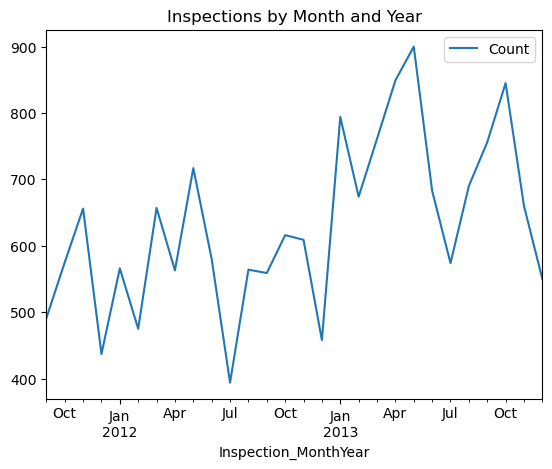

In [99]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

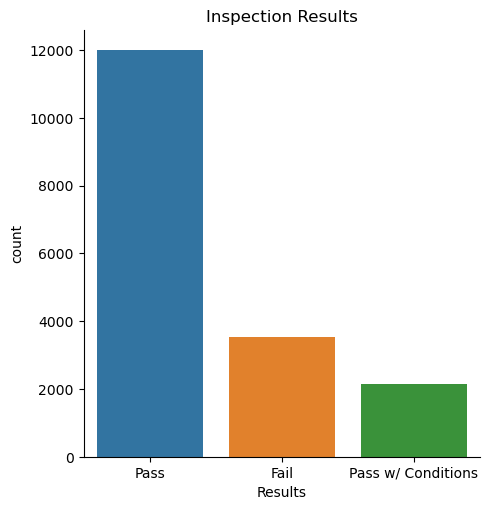

In [100]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

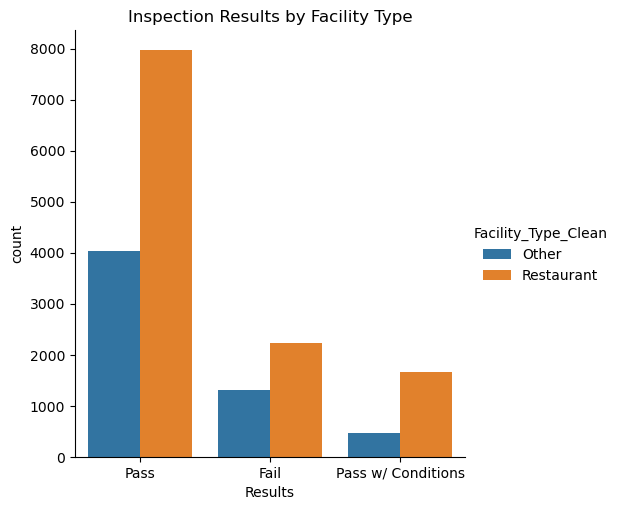

In [101]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [102]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [103]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                    'Facility_Type', 
                                                    'LICENSE_DESCRIPTION', 
                                                    'WARD_PRECINCT'])

# get dummies
X = pd.get_dummies(X)

In [104]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,1,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,1,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,1,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,1,0,1,0,0,0,1


In [105]:
# import library for training-testing-splitting
from sklearn.model_selection import train_test_split

# set the random seed
np.random.seed(10)

X_train, X_validate, y_train, y_validate = train_test_split(X, 
                                                            y, 
                                                            train_size = .75, 
                                                            test_size=0.25,
                                                            stratify=y)

print(X_train.shape)
print(X_validate.shape)

(11483, 41)
(3828, 41)


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [106]:
# load libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [107]:
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_validate, cross_val_score

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [108]:
np.random.seed(10)

### Model 1

Logistic Regression fits a logistic function to the training data to make predictions. Its a simple model which has the advantage of being easy to interpret. Its fast to train and predict. It provides a good baseline. However it can be less accurate than more complex algorithms like random forests or XGboost. It also can overfit and be more sensitive to outliers.

A value of this model in this case of food safety is that it is easier to interpret, so for instance, we may learn that previous violations is the key predictor for instance.

In [109]:
# intitiate instance of logit model
log_reg = LogisticRegression()

# fit the model - learning the relationship between features (x_train) and labels (y_train)
log_model = log_reg.fit(X_train, y_train)

# pull out the predicted values and store as an object
y_pred = log_model.predict(X_validate)

In [111]:
# hyperparameter tuning
# ----------

# import libraries
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

# set parameters. This is parameter for logistic regression model we will test.
# We can test different ones 
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}

# execute the grid search and fit to training data
log_grid = GridSearchCV(log_model, 
                          param_grid, 
                          cv=5)
log_grid.fit(X_train, 
               y_train)

# choose best performing model
best_index = np.argmax(log_grid.cv_results_["mean_test_score"])
best_log_pred = log_grid.best_estimator_.predict(X_validate)

# print results
#These are parameters for the best model
print(log_grid.cv_results_["params"][best_index])

{'C': 0.1, 'fit_intercept': True, 'penalty': 'elasticnet', 'solver': 'liblinear'}


In [112]:
print('Validation Accuracy', accuracy_score(best_log_pred, y_validate))

Validation Accuracy 0.9268547544409613


###  Model 2

Random Forest is an ensemble learning model, that combines multiple decision trees, taking the prediction of each tree and using a majority vote of the trees to make a final prediction.

This reduces the overfitting problem with individual decision trees. Random forests are made up of trees that are trained on different subsets of the data which helps reduce overfitting, compared to a decision tree that is trained on the entire dataset and can be overfitted to the training data and less accurate to new data. Random forests are also more robust to noise and outliers because they are made up of many decision trees and smooth out those issues.

Cons include being slower to train, and less interpretable than the previous logistic regression model.

The value of this model in this case may be that it can handle complex datasets with mutliple features and identify important features, perhaps there are many possible factors such as humidity, type of food establishment etc to sort through when identifying food safety violations. It can also handle nonlinear relationships and be more robust to noise and outliers.

In [113]:
# initialize a random forest classifier
# ----------
rf_classifier = RandomForestClassifier(
                       # specify parameters
                       n_estimators=100,              # specify the number of trees (100 is default)
                       criterion='gini',              # or you can use 'entropy' for information gain
                       max_depth=None,                # how deep tree nodes can go
                       min_samples_split=2,           # samples needed to split node
                       min_samples_leaf=1,            # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,             # number of features to look for when splitting
                       max_leaf_nodes=None,           # max nodes
                       min_impurity_decrease=1e-07,   # early stopping
                       random_state = 10)             # random seed

In [114]:
rf_accuracy_scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

# print and calculate the average score across models
# ----------
print("RF Accuracy:", rf_accuracy_scores.mean())

RF Accuracy: 0.921429109109314


### Model 3

AdaBoost is another ensemble learning method that combines the weak learners to make a stronger classifier. Unlike the random forest, which takes a vote from many different decision trees who run in parallel, the boosting approach trains the weak learners iteratively, focusing on the errors, and thus the advantage is higher accuracy and ability to use in difficult classification cases. 

The cons is that it can be computationally complex and expensive to run. It can also be prone to overfitting. And when the weak learners are highly correlated, that is they tend to make the same mistakes, it can make Adaboost less effective and possibly overfit and make poor predictions on new data.  

This model may offer value in this case by focusing on cases with higher error.

In [115]:
# initialize an adaptive boosting classifer 
# ----------
ada_classifier = AdaBoostClassifier(n_estimators=100)

ada_accuracy_scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

print("Ada Accuracy:", ada_accuracy_scores.mean())

Ada Accuracy: 0.9146365471623236


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

Accuracy is the proportion of correct predictions. Total correct predictions divided by total number of predictions.

Precision is the proportion of correct positive predictions. Total correct positive predictions divided by total number of positive predictions.

Recall is the proportion of actual positives that are correctly identified by the model. Total correct positive predictions divded by number of actual positives.

F1 is a balance of precision and recall. Its calculated by 2 * (precision * recall)/(precision + recall).

-------
Accuracy is used when the cost of misclassification is relatively equal for false positives and false negatives, and the distribution in the classes is relatively balanced. 

Accuracy may be an issue if the distribution is imbalanced. For instance, in class our example involved a dataset where there was an imbalance in classes where there were many more observations in the income class below $50k vs above $50k, meaning an algorithm could optimize for accuracy by guessing income below $50k more often.

Looking at our data exploration in this project, our data shows roughly 14,000 pass or pass w/ condition results and only 4,000 fail results. Therefore this imbalance would be an issue.

Precision is used when the cost of false positives is high, and you want to minimize those false positives. For instance, getting a false positive result that someone has cancer might be very alarming and you would want to minimize those false positives and prioritize precision.

Recall is used when the cost of false negatives is high, and you want to identify as many true positives as possible. For instance, not detecing someone has COVID and might spread it in a high risk environment might be an issue, so you would want to minimize false negatives and prioritze recall.

F1 is used when you want to balance both precision and recall and they are both important.

-------

Given the issue we are trying to address is food safety, it seems we want to minimize false negatives. That is we don't want food safety violations to go undetected and risk public health and safety. Therefore we want to prioritize recall in this context.

Accuracy

In [116]:
# calculate accuracy using cross validation
# ----------
log_accuracy_scores = cross_val_score(log_grid.best_estimator_, 
                         X, 
                         y.ravel(), 
                         cv=5)

rf_accuracy_scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), # Some algorithms will expect you to ravel the target
                         cv=5)

ada_accuracy_scores = cross_val_score(ada_classifier,  # specify classifier
                         X,               # specify features
                         y.ravel(),       # specify labels
                         cv = 5)          # specify 5-fold cross validation

print("Log Accuracy:", log_accuracy_scores.mean())
print("RF Accuracy:", rf_accuracy_scores.mean())
print("Ada Accuracy:", ada_accuracy_scores.mean())

Log Accuracy: 0.9226045127224859
RF Accuracy: 0.921429109109314
Ada Accuracy: 0.9146365471623236


Precision

In [117]:
# Evaluate the model using cross-validation

# Create a precision scorer
precision_scorer = make_scorer(precision_score)

log_precision_scores = cross_val_score(log_grid.best_estimator_, 
                         X, 
                         y.ravel(), 
                         cv=5,
                        scoring=precision_scorer)

rf_precision_scores = cross_val_score(rf_classifier, 
                         X, 
                         y.ravel(), 
                         cv=5,
                        scoring=precision_scorer)

ada_precision_scores = cross_val_score(ada_classifier, 
                         X, 
                         y.ravel(), 
                         cv=5,
                        scoring=precision_scorer)

print("Log Precision:", log_precision_scores.mean())
print("RF Precision:", rf_precision_scores.mean())
print("Ada Precision:", ada_precision_scores.mean())

Log Precision: 0.7817924735758419
RF Precision: 0.770137294314542
Ada Precision: 0.7792467108084036


Recall

In [118]:
# Create a recall scorer
recall_scorer = make_scorer(recall_score)

log_recall_scores = cross_val_score(log_grid.best_estimator_, 
                         X, 
                         y.ravel(), 
                         cv=5,
                        scoring=recall_scorer)

rf_recall_scores = cross_val_score(rf_classifier, X, y.ravel(), cv=5, scoring=recall_scorer)

ada_recall_scores = cross_val_score(ada_classifier, X, y.ravel(), cv=5, scoring=recall_scorer)

print("Log Recall:", log_recall_scores.mean())
print("RF Recall:", rf_recall_scores.mean())
print("Ada Recall:", ada_recall_scores.mean())

Log Recall: 0.8578238999648576
RF Recall: 0.8710888367872522
Ada Recall: 0.8066429586736111


F1

In [119]:
# Create a f1 scorer
f1_scorer = make_scorer(f1_score)

log_f1_scores = cross_val_score(log_grid.best_estimator_, 
                         X, 
                         y.ravel(), 
                         cv=5,
                        scoring=f1_scorer)

rf_f1_scores = cross_val_score(rf_classifier, X, y.ravel(), cv=5, scoring=f1_scorer)

ada_f1_scores = cross_val_score(ada_classifier, X, y.ravel(), cv=5, scoring=f1_scorer)

print("Log F1:", log_f1_scores.mean())
print("RF F1:",rf_f1_scores.mean())
print("Ada F1:", ada_f1_scores.mean())

Log F1: 0.8169336568933815
RF F1: 0.8171364783970139
Ada F1: 0.7912716172501808


## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

Logistic Regression

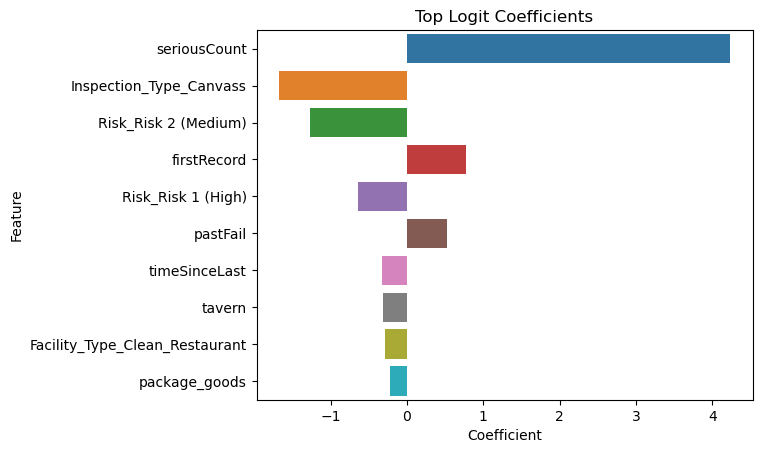

In [120]:
# defining the model from the previous section with hyperparameter tuning

best_log_model = log_grid.best_estimator_.fit(X, y.ravel())

# extract the coefficents and create a dataframe for plotting 

logit_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(best_log_model.coef_))],
                       axis = 1)

logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

# plot 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

Random Forest

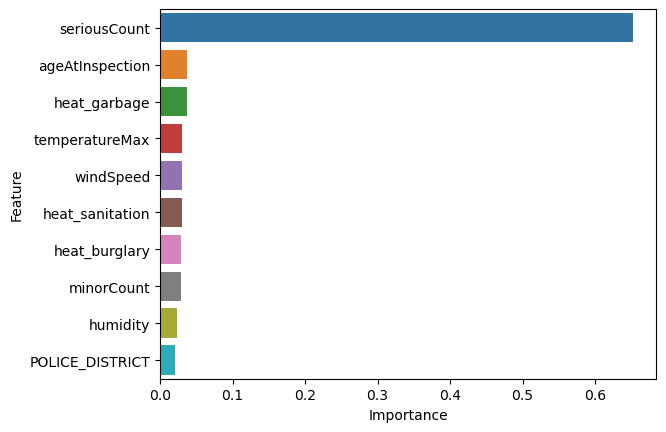

In [121]:
# fit the random forest on data to get feature importance
# ----------
rf_classifier.fit(X, y.ravel())


# create feature importance dataframe
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

AdaBoost 

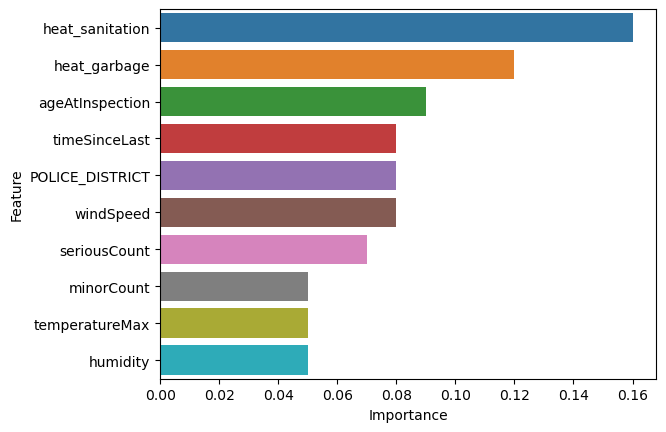

In [122]:
# fit the AdaBoost on data to get feature importance
# ----------
ada_classifier.fit(X, y.ravel())

# create feature importance dataframe
ada_feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ada_classifier.feature_importances_))], axis = 1)
ada_feat_importances.columns = ["Feature", "Importance"]

# plot 
sns.barplot(x = "Importance", 
            y = "Feature", 
            data = ada_feat_importances.nlargest(10, 'Importance')) # identify the 10 most important features
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [161]:

# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------

from sklearn.ensemble import VotingClassifier

# specify a "soft" voting classifer in this iteration
# ----------
voting_classifier = VotingClassifier(
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier)], 
                        voting = 'soft')

voting_model = voting_classifier.fit(X_train, y_train)

In [175]:
voting_recall_scores = cross_val_score(voting_classifier, X_validate, y_validate, cv=5, scoring=recall_scorer)

print("Voting Classifier Recall:", voting_recall_scores.mean())

Voting Classifier Recall: 0.887314620863008


In [162]:
# use the voting classifer model to predict on validation set

proba = voting_model.predict_proba(X_validate)

In [176]:
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------

# get probabilities for fail for second column, class 1 
proba_fail = proba_predictions[:, 1]

# Sort the indices based on the probabilities of fail in descending order
sorted_indices = np.argsort(proba_fail)[::-1]

# Sort the proba_predictions array based on sorted indices
sorted_proba = proba[sorted_indices]

# first 1,000 observations
topthousand = sorted_proba[:1000, 1]

topthousand

array([0.8347839 , 0.8362407 , 0.83357894, 0.83186757, 0.82857478,
       0.83561406, 0.83120628, 0.83140752, 0.83172408, 0.83363131,
       0.83612799, 0.83291688, 0.83312848, 0.83319132, 0.83271104,
       0.82867552, 0.8333299 , 0.8329412 , 0.8318223 , 0.83719703,
       0.83053755, 0.83672917, 0.83276138, 0.83477893, 0.83296546,
       0.83136025, 0.83181737, 0.83281526, 0.83310866, 0.83383782,
       0.83452286, 0.83316504, 0.83049303, 0.83200948, 0.83505986,
       0.83691062, 0.83238736, 0.83135553, 0.83614393, 0.83381177,
       0.83738928, 0.83300924, 0.83343956, 0.82954686, 0.83340807,
       0.83080013, 0.82106582, 0.8300698 , 0.83024644, 0.82928594,
       0.83315358, 0.82808503, 0.82750408, 0.83437975, 0.82802159,
       0.83129131, 0.82738083, 0.83240677, 0.827497  , 0.83331542,
       0.82978477, 0.82686079, 0.83202329, 0.83222444, 0.82980554,
       0.83302643, 0.82967616, 0.82583058, 0.83359809, 0.83262914,
       0.82194131, 0.82496671, 0.82898926, 0.82412471, 0.49735

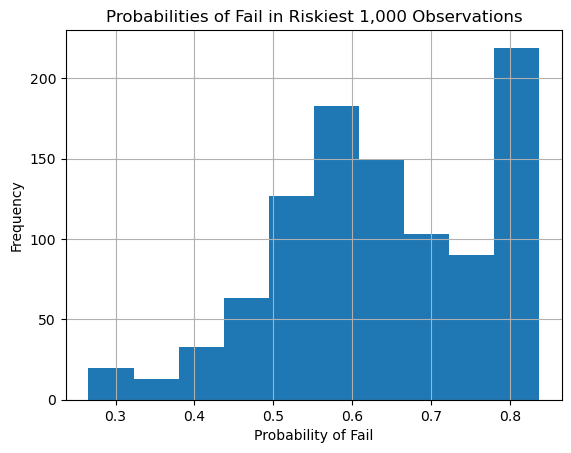

In [182]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

# Plotting the distribution of pass/fail
plt.hist(topthousand)
plt.title('Probabilities of Fail in Riskiest 1,000 Observations')
plt.xlabel('Probability of Fail')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

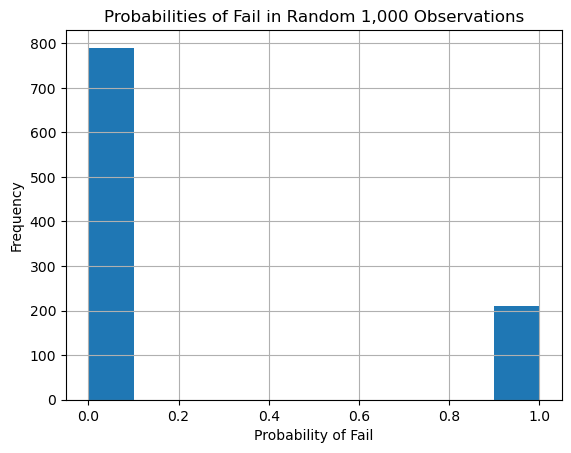

In [183]:
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
randomthousand = chicago_inspections_2011_to_2013.sample(n=1000, replace=False)

y_random = randomthousand['Results']

y = y_random.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# Plotting the distribution of pass/fail
plt.hist(y)
plt.title('Probabilities of Fail in Random 1,000 Observations')
plt.xlabel('Probability of Fail')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Using the machine learning model will result in capturing a much riskier set of 1000 establishments, with higher probabilities to fail than doing a random set of 1000 establishments. Thus, you can use the algorithm to prioritze your audits with limited resources. 

The voting classifier resulted in about a 89% recall score, so of every 100 actual violations, it will predict roughly 89 of them. 

Doing a random audit of a 1000 places, you will find about 200 violations based on the graph above, and from the dataset visualization, the distribution of fail is around 28%, or 286 actual violations in every 1000 places -- therefore the random audit has a recall of 200/286 or 70% rate of finding violations.

The predictive auditing performed better than the random auditing.

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [123]:
chicago_inspections_2014.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'WARD_PRECINCT', 'POLICE_DISTRICT', 'LICENSE_CODE',
       'LICENSE_DESCRIPTION', 'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY',
       'LICENSE_NUMBER', 'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement

In [124]:
# data processing
# -----------

# drop column names related to geography, identification, date and time

chicago_inspections_2014.drop(columns=['AKA_Name',
                                        'Address',
                                        'City',
                                        'State',
                                        'Zip',
                                        'Latitude',
                                        'Longitude',
                                        'Location',
                                        'ID',
                                        'LICENSE_ID',
                                        'LICENSE_TERM_START_DATE',
                                        'LICENSE_TERM_EXPIRATION_DATE',
                                        'LICENSE_STATUS',
                                        'ACCOUNT_NUMBER',
                                        'LEGAL_NAME',
                                        'DOING_BUSINESS_AS_NAME',
                                        'ADDRESS',
                                        'CITY',
                                        'STATE',
                                        'ZIP_CODE',
                                        'WARD',
                                        'PRECINCT',
                                        'LICENSE_CODE',
                                        'BUSINESS_ACTIVITY_ID',
                                        'BUSINESS_ACTIVITY',
                                        'LICENSE_NUMBER',
                                        'LATITUDE',
                                        'LONGITUDE',
                                        'Inspection_Date',
                                        'minDate',
                                        'maxDate',
                                         'License'],
                             inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [194]:
# drop missing values
chicago_inspections_2014clean = chicago_inspections_2014.dropna()

# process target 

y_test2014 = chicago_inspections_2014clean['Results']

# process features
X_test2014 = chicago_inspections_2014clean.drop(columns = ['Results',
                                                'Facility_Type',
                                                'LICENSE_DESCRIPTION',
                                                      'WARD_PRECINCT'])

# get dummies
X_test2014 = pd.get_dummies(X_test2014)

# view feature datset
X_test2014.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920445,SUBWAY,2,0,0,0,0,0,0,0.794521,0,4.0,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,1,0,0,1,0,1,0,0,1,0
920446,SHARKS FISH & CHICKEN,0,0,6,0,0,0,2,0.660274,0,4.0,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,0,1,0,1,0,1,0,0,0,1
920448,P K PETRO INC.,0,1,7,0,0,0,0,2.000000,1,3.0,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,0,0,1,1,1,0,0,0,0,1
920449,"Z T DOLLAR EXCHANGE,INC",1,2,5,0,0,0,0,2.000000,1,3.0,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,0,0,1,1,1,0,0,0,1,0
920450,KENNEDY FISH & CHICKEN,0,1,7,0,0,0,3,0.964384,0,3.0,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.662066,27.638311,78.175677,0,1,0,0,1,0,1,0,0,0,1


In [195]:
X_test2014.shape

(3937, 41)

In [205]:
#process target

# binarize the outcome variable
y2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y2014 = lb_style.fit_transform(y2014)

# recode 0s and 1s so 1s are "Fail"
y2014 = np.where(y2014 == 1, 0 ,1)

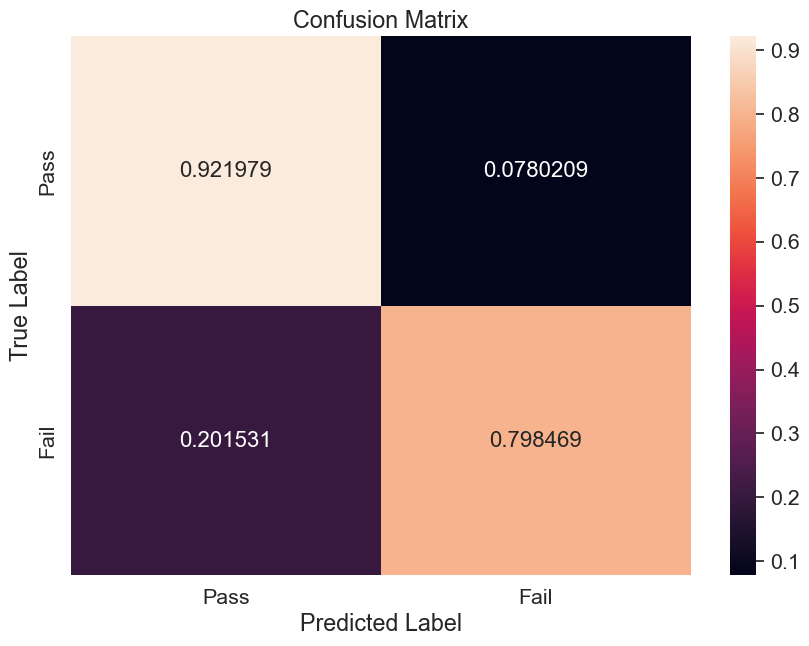

In [207]:
# predict and compare 

y_predictrf = rf_classifier.predict(X_test2014)

# create a confusion matrix
cf_matrix = confusion_matrix(y2014,
          	y_predictrf,
        	normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm,
       	annot=True,
       	annot_kws={"size": 16},
       	fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

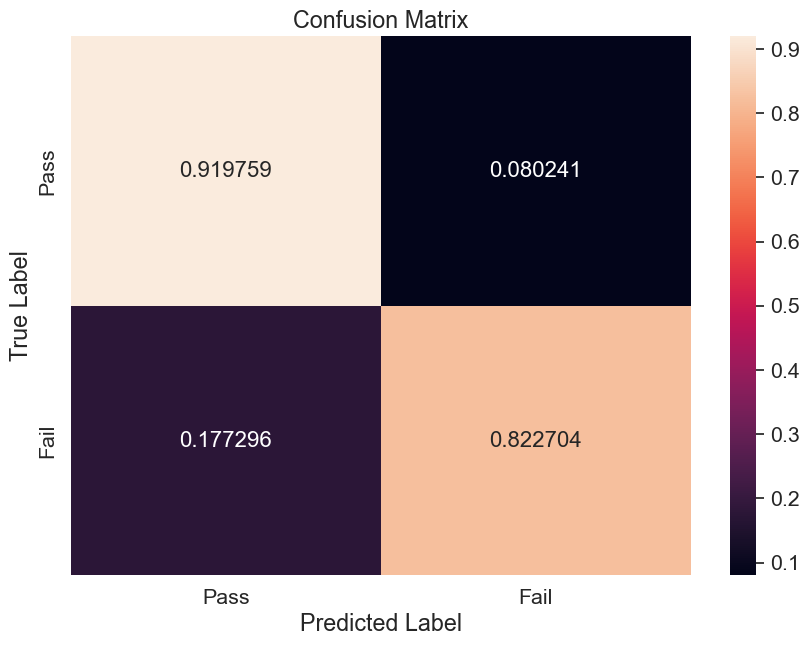

In [208]:
# predict and compare 

y_predictvoting = voting_classifier.predict(X_test2014)

# create a confusion matrix
cf_matrix = confusion_matrix(y2014,
          	y_predictvoting,
        	normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm,
       	annot=True,
       	annot_kws={"size": 16},
       	fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [211]:
rf2014_accuracy_scores = cross_val_score(rf_classifier, X_test2014, y2014.ravel(), cv=5)
rf2014_precision_scores = cross_val_score(rf_classifier, X_test2014, y2014.ravel(), cv=5, scoring=precision_scorer)
rf2014_recall_scores = cross_val_score(rf_classifier, X_test2014, y2014.ravel(), cv=5, scoring=recall_scorer)
rf2014_f1_scores = cross_val_score(rf_classifier, X_test2014, y2014.ravel(), cv=5, scoring=f1_scorer)

voting2014_accuracy_scores = cross_val_score(voting_classifier, X_test2014, y2014.ravel(), cv=5)
voting2014_precision_scores = cross_val_score(voting_classifier, X_test2014, y2014.ravel(), cv=5, scoring=precision_scorer)
voting2014_recall_scores = cross_val_score(voting_classifier, X_test2014, y2014.ravel(), cv=5, scoring=recall_scorer)
voting2014_f1_scores = cross_val_score(voting_classifier, X_test2014, y2014.ravel(), cv=5, scoring=f1_scorer)

print("RF Accuracy:", rf2014_accuracy_scores.mean())
print("RF Precision:", rf2014_precision_scores.mean())
print("RF Recall:", rf2014_recall_scores.mean())
print("RF F1:", rf2014_f1_scores.mean())

print("Voting Classifier Accuracy:", voting2014_accuracy_scores.mean())
print("Voting Classifier Precision:", voting2014_precision_scores.mean())
print("Voting Classifier Recall:", voting2014_recall_scores.mean())
print("Voting Classifier F1:", voting2014_f1_scores.mean())

RF Accuracy: 0.8963696231270841
RF Precision: 0.7224385827615432
RF Recall: 0.784509227502858
RF F1: 0.7506179013598757
Voting Classifier Accuracy: 0.9019578944652636
Voting Classifier Precision: 0.738175223398714
Voting Classifier Recall: 0.7908704883227177
Voting Classifier F1: 0.7622243124516241


As discussed in the metrics section, since the issue is food safety, we don't want food safety violations to go undetected and risk public health and safety. Therefore we may want to minimize false negatives and prioritize recall in this context. Of the original three models, logistic regression, random forest and AdaBoost I chose random forest for the best recall metric, however they were pretty similar.

I tried a voting classifier, combining all three logistic regression, random forest and adaboost, with a soft vote. This may help when the classes are imbalanced, as is the case here where there are far more passes than fails in the datasets. However given the models that the voting classifier are combining are pretty similar, it may not be as effective. 

As we can see, the metrics for the random forest classifier and voting classifier turned out to be pretty similar.

Overall this model can help predict the establishments that are most at risk of violations, especially compared to the results when we chose a random audit.

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


Accuracy is just one measure, that measures the ratio of correct observations to incorrect ones. Depending on the context and purpose, you may use other metrics. 

For instance, when it comes to decisions like choosing to keep someone locked up in jail based on an identification of risk from a machine learning algorithm, you may want to minimize false positives that end up keeping people locked up who otherwise would not be identified to be locked up. In this case you may decide to use the model with the best precision (ratio of correct positive predictions to total number of positive predictions).

In other cases, you may choose another metric, for instance recall, to minimize false negatives. The social cost of not identifying someone with a very infectious and serious disease and missing the ability to take cautionary measures may be much higher than having a false positive rate and perhaps the inconvenience of someone misidentified as positive.

Thus the choice between and use of metrics beyond accuracy is important in social sciences and public policy where there are different values and impacts to be considered and traded off.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

Even without machine learning, one would face the potential issue of intentional evasion by business trying to avoid whatever metric they perceived as leading to audits. A flip example is the business of college admission coaching, where businesses attempt to help applicants game whatever factors will support their admission. No matter if the decision is based on an algorithm or human selected criteria, there will be this element, thus its important to realize not only does an algorithm system analyze and predict behavior, it too can impact and shape behavior.

In some ways, potentially the changed behavior could be a positive outcome if the steps establishments took to avoid audits led to greater food safety. Audits and the threat of audits are used not only to catch violations but deter them.

The only way to fully avoid the potential evasion is to have random audits, or partially randomized elements. However the tradeoff is the potential loss in effectiveness of using limited resources. Another way is for algorithms to be very secret and properitary, however again there is a tradeoff in lack of accountability and transparency.

Also any algorithmic decision making should be constantly re-evaluated, not only for effectiveness, which can catch any adjustments that need to be made as establishments change their behavior, but also to monitor for fairness.
